In [2]:
import numpy as np
import pandas as pd

import rpy2.rinterface
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
pandas2ri.activate()

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R 
# read in necessary packages
pack <- c("tidyverse", "plyr", "dplyr", "FNN", "modelr", "rpart", "doParallel", "grf")
invisible(suppressMessages(suppressWarnings(lapply(pack, require, character.only = TRUE))))

# load relevant functions
source("../student-project-timmens/Simulation_Study/helper_functions/rf_cate_JASA.R")
source("../student-project-timmens/Simulation_Study/helper_functions/simAW.R")

R[write to console]: Error in file(filename, "r", encoding = encoding) : 
  cannot open the connection
Calls: <Anonymous> -> <Anonymous> -> withVisible -> source -> file

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In file(filename, "r", encoding = encoding) :
R[write to console]: 
 
R[write to console]:  cannot open file '../student-project-timmens/Simulation_Study/helper_functions/rf_cate_JASA.R': No such file or directory




Error in file(filename, "r", encoding = encoding) : 
  cannot open the connection
Calls: <Anonymous> -> <Anonymous> -> withVisible -> source -> file


In [3]:
%%R
# set parameter values
n <- 500
d <- 8
kC <- 50

# simulate data 
r_df <- simAW(n, kC, d)

# compute (what is this)???
# rf_cate_JASA(data = dat, num_trees = 100)                             

Now we have to transform the R DataFrame to a pandas DataFrame.

In [4]:
r_df = ro.r('r_df')
with localconverter(ro.default_converter + pandas2ri.converter):
  df = ro.conversion.rpy2py(r_df)
df.head()

,Y0,Y1,X,D,Y_obs,IntXD,CATE,trueps,pslog,psprob,tauihat,tauhatknn
1,4.854797,10.980858,0.980579,0,4.854797,0.000000,5.961158,0.5,0.526741,0.526746,5.974088,6.715882
2,2.897315,9.723292,0.743415,0,2.897315,0.000000,5.486829,0.5,0.515771,0.515772,6.002913,4.971502
3,1.758860,8.459647,0.756512,1,8.459647,0.756512,5.513024,0.5,0.516377,0.516378,5.017801,6.070831
4,2.821488,9.792756,0.749365,1,9.792756,0.749365,5.498730,0.5,0.516047,0.516047,6.218849,5.501970
5,3.798968,7.177952,0.403127,1,7.177952,0.403127,4.806254,0.5,0.500007,0.500007,5.017588,4.452004


At last we will construct pandas DataFrames and Series for y, X and D

In [5]:
y = (df['D'] * df['Y1'] + (1 - df['D']) * df['Y0'])
X = (df['X'])
D = (df['D'])

In [6]:
import CausalTree as ct
from CausalTree import *

In [7]:
ctree_sparse, ctree_opt = ct.CausalTree.apply_kFold_CV(X, y, D)

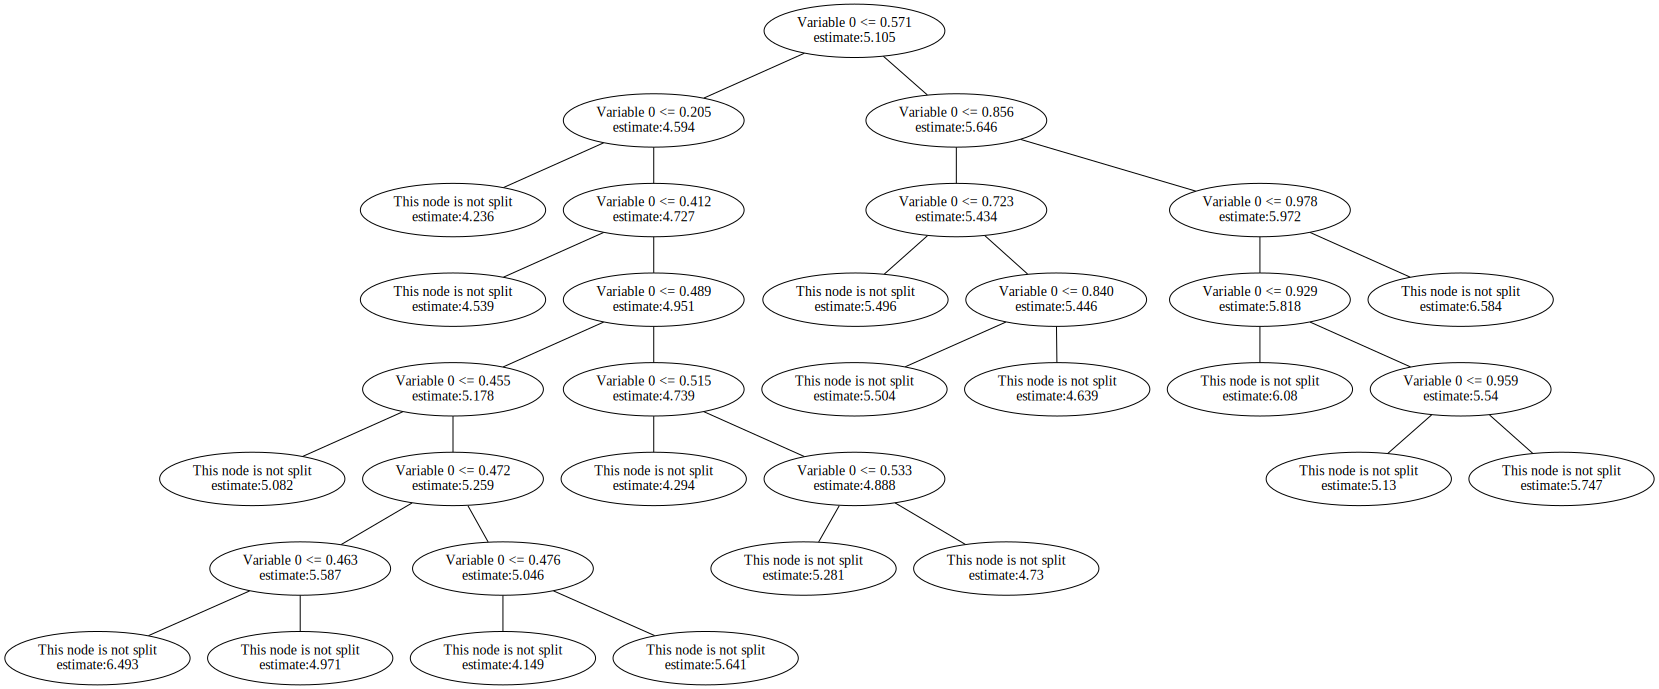

In [8]:
ctree_sparse.plot()

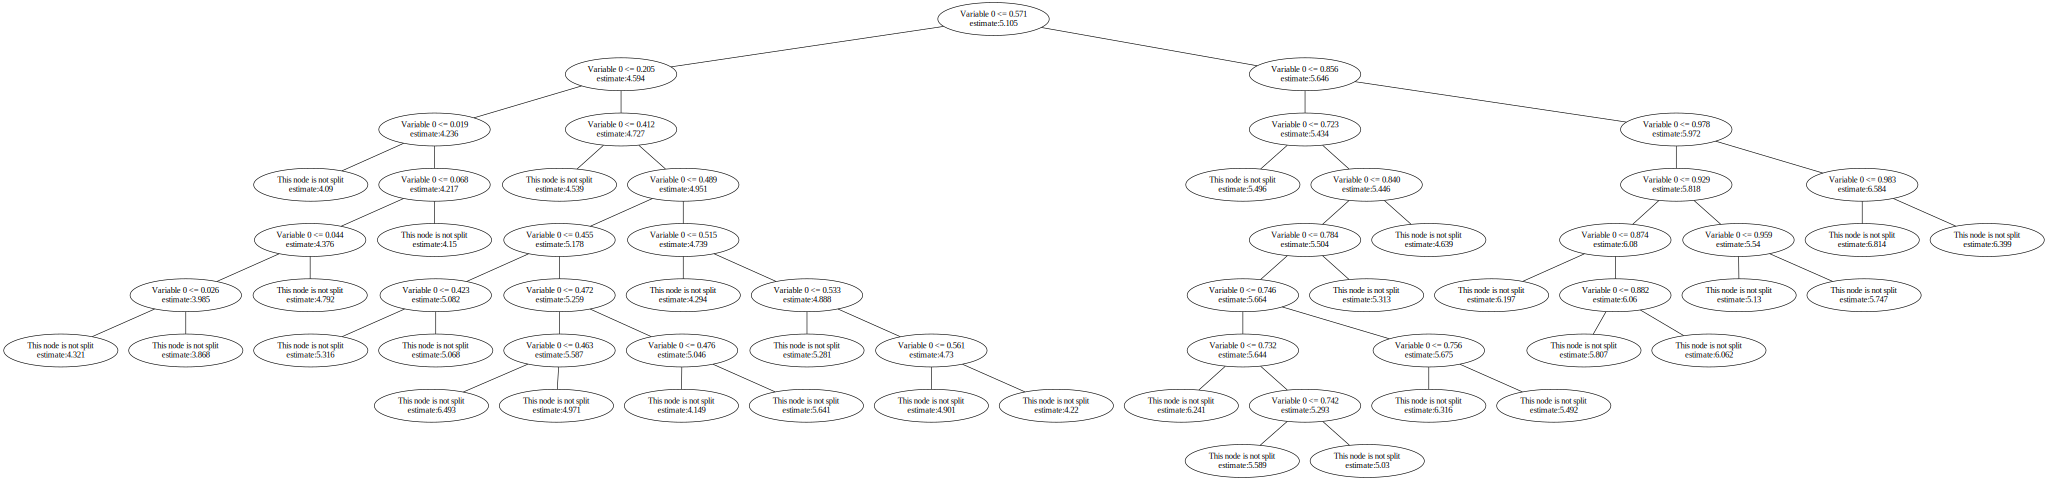

In [9]:
ctree_opt.plot()

In [10]:
ctree_sparse

Causal Tree; fitted = True; id = 140326856290376

In [11]:
tau_hat = ctree_sparse.predict(X)
tau_real = df['CATE']